# Final Data Report
## NBA Teams and their Google Popularity

#### Joshua Malone

There are a couple questions I want to answer by using the data you will see in this report. First, I want to know what NBA teams ware the most popular over the last year based on their google popularity, as well as what times of the year seems to be the most popular around the NBA as a whole. 

What I mean by team's 'Google Popularity' is how much they appear on Google searches, and for that I am using Google Trends. For the data I gathered from Google Trends, I looked at data for the last 12 months. Google Trends then gave me .csv files, where I wrangled the data a bit in order to get data by month, and for the last 12 months as a whole.

My hypothesis for my first question, which teams are the most popular, is that for the most part it is going to be teams with big markets like Bostson, Golden State, New York, and Los Angeles. For my second question, what times of the year is the NBA the most popular, I am assuming that the most popular times of year will be from November through Feburary, which is the prime of the season. Additionally, there may be a jump around during the spring time, as well as late May and June, as this is when the Finals are, as well as maybe one month during the summer when free agency is popular.

Below I am bringing in the packages I need in order to look at my raw data, as well as be able to visualize it later on.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Below I am setting a dislpay option that allows me to view my DataFrames as a whole, if I were to not do this, they would not completley display since they are relativley large

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
teamsdata = pd.read_csv('nbadata.csv', sep = ',')

What I had to do to access the data is put each NBA team into Google Trends search that I described earlier. You are only able to search for 5 'terms' at a time on Trends, meaning that I had to search for 5 teams at a time, which I ended up doing by division since the NBA is split up into 6 divisions of 5 teams each. It gave me a .csv file for each search (6 total), which I then wrangled and put it all into one .csv file to have all the data in one file. I also removed some small unnecessary detials from the files.

So below every team is listed and the numbers are the teams popularity on Google by week. 

The values that you see here are what I will call their 'popularity score' based on Google Trends. 100 is the highest possible value, and 1 is the lowest, meaning that if a team has a value of 100 for any given time period, that was when they were the most popular.

In [5]:
teamsdata.head()

,Week,Boston Celtics,Philadelphia 76ers,Toronto Raptors,Brooklyn Nets,New York Knicks,Milwaukee Bucks,Cleveland Cavaliers,Chicago Bulls,Indiana Pacers,Detroit Pistons,Atlanta Hawks,Washington Wizards,Miami Heat,Charlotte Hornets,Orlando Magic,Denver Nuggets,Minnesota Timberwolves,Utah Jazz,Portland Trail Blazers,Oklahoma City Thunder,Phoenix Suns,Los Angeles Clippers,Sacramento Kings,Golden State Warriors,Los Angeles Lakers,New Orleans Pelicans,Memphis Grizzlies,Dallas Mavericks,San Antonio Spurs,Houston Rockets
0,12/5/2021,8,5,1,5,5,17,12,29,6,7,6,5,9,7,3,15,12,17,21,13,5,3,2,17,20,3,7,8,6,9
1,12/12/2021,6,7,1,5,8,14,14,16,8,8,6,5,10,5,5,16,20,15,22,8,6,2,2,22,23,3,5,8,4,8
2,12/19/2021,9,5,1,3,8,21,14,27,5,8,8,4,10,5,3,14,14,18,14,11,8,2,2,17,25,3,6,8,6,6
3,12/26/2021,6,5,1,8,5,13,17,32,7,6,6,5,10,5,4,23,15,26,17,11,7,3,2,16,26,3,9,9,5,8
4,1/2/2022,6,5,2,8,6,17,14,34,9,8,8,7,10,6,3,17,16,33,15,8,5,3,2,16,22,4,7,9,3,7


There were some teams that had <1 values for their searches for some given weeks, so for the sake of this data, and not being able to know what that exact value is, I have replaced all of the '<1" values to just be the value 1.

In [6]:
teamsdata2 = teamsdata.replace('<1', 1)

Below, I am pulling in the wrangled data where I summed all the weeks in a month together, so I can see what each teams popularity by month is.

In [7]:
weekmonthdata = pd.read_csv('nbateamsv2.csv', sep = ',')

In [8]:
weekmonthdata.head(10)

,Unnamed: 0,Week,Boston Celtics,Philadelphia 76ers,Toronto Raptors,Brooklyn Nets,New York Knicks,Milwaukee Bucks,Cleveland Cavaliers,Chicago Bulls,Indiana Pacers,Detroit Pistons,Atlanta Hawks,Washington Wizards,Miami Heat,Charlotte Hornets,Orlando Magic,Denver Nuggets,Minnesota Timberwolves,Utah Jazz,Portland Trail Blazers,Oklahoma City Thunder,Phoenix Suns,Los Angeles Clippers,Sacramento Kings,Golden State Warriors,Los Angeles Lakers,New Orleans Pelicans,Memphis Grizzlies,Dallas Mavericks,San Antonio Spurs,Houston Rockets
0,0,1/2/2022,6.0,5.0,2.0,8.0,6.0,17.0,14.0,34.0,9.0,8.0,8.0,7.0,10.0,6.0,3.0,17.0,16.0,33.0,15.0,8.0,5.0,3.0,2.0,16.0,22.0,4.0,7.0,9.0,3.0,7.0
1,1,1/9/2022,6.0,5.0,2.0,6.0,7.0,18.0,18.0,40.0,7.0,9.0,7.0,5.0,11.0,8.0,2.0,17.0,14.0,15.0,16.0,9.0,4.0,2.0,2.0,28.0,18.0,3.0,14.0,9.0,4.0,5.0
2,2,1/16/2022,6.0,5.0,1.0,5.0,7.0,15.0,14.0,29.0,8.0,9.0,7.0,6.0,10.0,6.0,4.0,21.0,18.0,20.0,14.0,8.0,5.0,2.0,2.0,16.0,21.0,3.0,6.0,9.0,4.0,6.0
3,3,1/23/2022,6.0,7.0,1.0,5.0,7.0,16.0,15.0,26.0,6.0,7.0,7.0,5.0,12.0,9.0,3.0,16.0,21.0,21.0,15.0,9.0,6.0,2.0,2.0,14.0,23.0,4.0,5.0,8.0,4.0,4.0
4,4,1/30/2022,7.0,8.0,2.0,6.0,5.0,12.0,15.0,25.0,6.0,8.0,9.0,5.0,11.0,7.0,4.0,19.0,16.0,18.0,20.0,8.0,6.0,3.0,2.0,16.0,17.0,3.0,8.0,9.0,5.0,6.0
5,Janurary,NaN,31.0,30.0,8.0,30.0,32.0,78.0,76.0,154.0,36.0,41.0,38.0,28.0,54.0,36.0,16.0,90.0,85.0,107.0,80.0,42.0,26.0,12.0,10.0,90.0,101.0,17.0,40.0,44.0,20.0,28.0
6,5,2/6/2022,11.0,14.0,2.0,9.0,11.0,28.0,24.0,33.0,12.0,9.0,8.0,7.0,11.0,9.0,4.0,22.0,21.0,26.0,28.0,15.0,8.0,3.0,3.0,13.0,28.0,7.0,6.0,12.0,4.0,6.0
7,6,2/13/2022,9.0,10.0,1.0,8.0,6.0,18.0,12.0,25.0,6.0,6.0,6.0,6.0,11.0,6.0,3.0,15.0,14.0,16.0,16.0,9.0,6.0,4.0,2.0,13.0,16.0,4.0,5.0,8.0,4.0,6.0
8,7,2/20/2022,6.0,9.0,1.0,4.0,4.0,9.0,10.0,19.0,4.0,7.0,5.0,3.0,8.0,4.0,2.0,11.0,15.0,10.0,15.0,8.0,4.0,2.0,1.0,7.0,11.0,3.0,4.0,5.0,3.0,3.0
9,8,2/27/2022,8.0,16.0,2.0,7.0,6.0,22.0,15.0,29.0,7.0,8.0,7.0,5.0,15.0,7.0,3.0,19.0,16.0,18.0,14.0,9.0,7.0,3.0,2.0,12.0,18.0,6.0,9.0,14.0,4.0,6.0


Below I am pulling in another file that I wrangled to only have the months, and not weeks, since I am not trying to determine the popularity by week.

In [8]:
monthlydata = pd.read_csv('nbateamsmonthly.csv', sep = ',')

In [9]:
monthlydata.head(12)

,Unnamed: 0,Boston Celtics,Philadelphia 76ers,Toronto Raptors,Brooklyn Nets,New York Knicks,Milwaukee Bucks,Cleveland Cavaliers,Chicago Bulls,Indiana Pacers,Detroit Pistons,Atlanta Hawks,Washington Wizards,Miami Heat,Charlotte Hornets,Orlando Magic,Denver Nuggets,Minnesota Timberwolves,Utah Jazz,Portland Trail Blazers,Oklahoma City Thunder,Phoenix Suns,Los Angeles Clippers,Sacramento Kings,Golden State Warriors,Los Angeles Lakers,New Orleans Pelicans,Memphis Grizzlies,Dallas Mavericks,San Antonio Spurs,Houston Rockets
0,Janurary,31.0,30.0,8.0,30.0,32.0,78.0,76.0,154.0,36.0,41.0,38.0,28.0,54.0,36.0,16.0,90.0,85.0,107.0,80.0,42.0,26.0,12.0,10.0,90.0,101.0,17.0,40.0,44.0,20.0,28.0
1,Feburary,34.0,49.0,6.0,28.0,27.0,77.0,61.0,106.0,29.0,30.0,26.0,21.0,45.0,26.0,12.0,67.0,66.0,70.0,73.0,41.0,25.0,12.0,8.0,45.0,73.0,20.0,24.0,39.0,15.0,21.0
2,March,39.0,44.0,10.0,32.0,21.0,78.0,56.0,87.0,21.0,33.0,28.0,24.0,53.0,26.0,16.0,93.0,83.0,76.0,59.0,40.0,28.0,11.0,6.0,51.0,90.0,23.0,31.0,41.0,19.0,25.0
3,April,69.0,53.0,17.0,55.0,12.0,132.0,56.0,125.0,13.0,22.0,66.0,10.0,74.0,21.0,7.0,159.0,248.0,136.0,37.0,27.0,49.0,15.0,5.0,73.0,50.0,68.0,77.0,74.0,16.0,13.0
4,May,288.0,49.0,5.0,6.0,9.0,225.0,18.0,30.0,10.0,17.0,10.0,5.0,286.0,10.0,6.0,22.0,22.0,25.0,29.0,19.0,71.0,5.0,6.0,239.0,32.0,6.0,112.0,272.0,5.0,11.0
5,June,201.0,11.0,4.0,7.0,17.0,21.0,19.0,34.0,11.0,26.0,14.0,7.0,25.0,11.0,7.0,24.0,30.0,44.0,37.0,27.0,7.0,5.0,4.0,211.0,31.0,6.0,7.0,20.0,10.0,14.0
6,July,20.0,9.0,5.0,7.0,18.0,22.0,20.0,36.0,16.0,23.0,13.0,9.0,28.0,13.0,8.0,22.0,29.0,49.0,40.0,28.0,8.0,5.0,5.0,23.0,44.0,7.0,8.0,19.0,10.0,13.0
7,August,9.0,5.0,4.0,5.0,9.0,13.0,19.0,21.0,7.0,10.0,8.0,4.0,14.0,6.0,4.0,13.0,13.0,31.0,20.0,14.0,4.0,4.0,4.0,11.0,27.0,4.0,4.0,8.0,4.0,8.0
8,September,18.0,4.0,4.0,4.0,8.0,16.0,15.0,21.0,4.0,10.0,7.0,5.0,16.0,6.0,4.0,16.0,14.0,29.0,19.0,9.0,7.0,4.0,4.0,10.0,24.0,4.0,4.0,9.0,4.0,8.0
9,October,43.0,30.0,6.0,28.0,23.0,71.0,67.0,85.0,27.0,41.0,27.0,20.0,48.0,25.0,19.0,96.0,80.0,84.0,95.0,42.0,23.0,12.0,9.0,67.0,95.0,30.0,29.0,40.0,17.0,26.0


Below is the last file I will be pulling in, and this has the sum of the data for the whole year.

In [10]:
yearlydata = pd.read_csv('nbateamsyearly.csv', sep = ',')

In [11]:
yearlydata

,Boston Celtics,Philadelphia 76ers,Toronto Raptors,Brooklyn Nets,New York Knicks,Milwaukee Bucks,Cleveland Cavaliers,Chicago Bulls,Indiana Pacers,Detroit Pistons,Atlanta Hawks,Washington Wizards,Miami Heat,Charlotte Hornets,Orlando Magic,Denver Nuggets,Minnesota Timberwolves,Utah Jazz,Portland Trail Blazers,Oklahoma City Thunder,Phoenix Suns,Los Angeles Clippers,Sacramento Kings,Golden State Warriors,Los Angeles Lakers,New Orleans Pelicans,Memphis Grizzlies,Dallas Mavericks,San Antonio Spurs,Houston Rockets
0,822,328,78,248,221,874,536,859,224,314,293,172,715,220,128,729,799,823,649,375,294,106,80,948,730,218,387,637,165,220


Below is a loop that will allow me to visualize every month of the year, and will dislpay which teams had the highest popularity for that month. Additionally, I will be able to view which months had the highest and lowest total popularity over the NBA as a whole. This is using the 'monthlydata' DataFrame that was seen earlier.

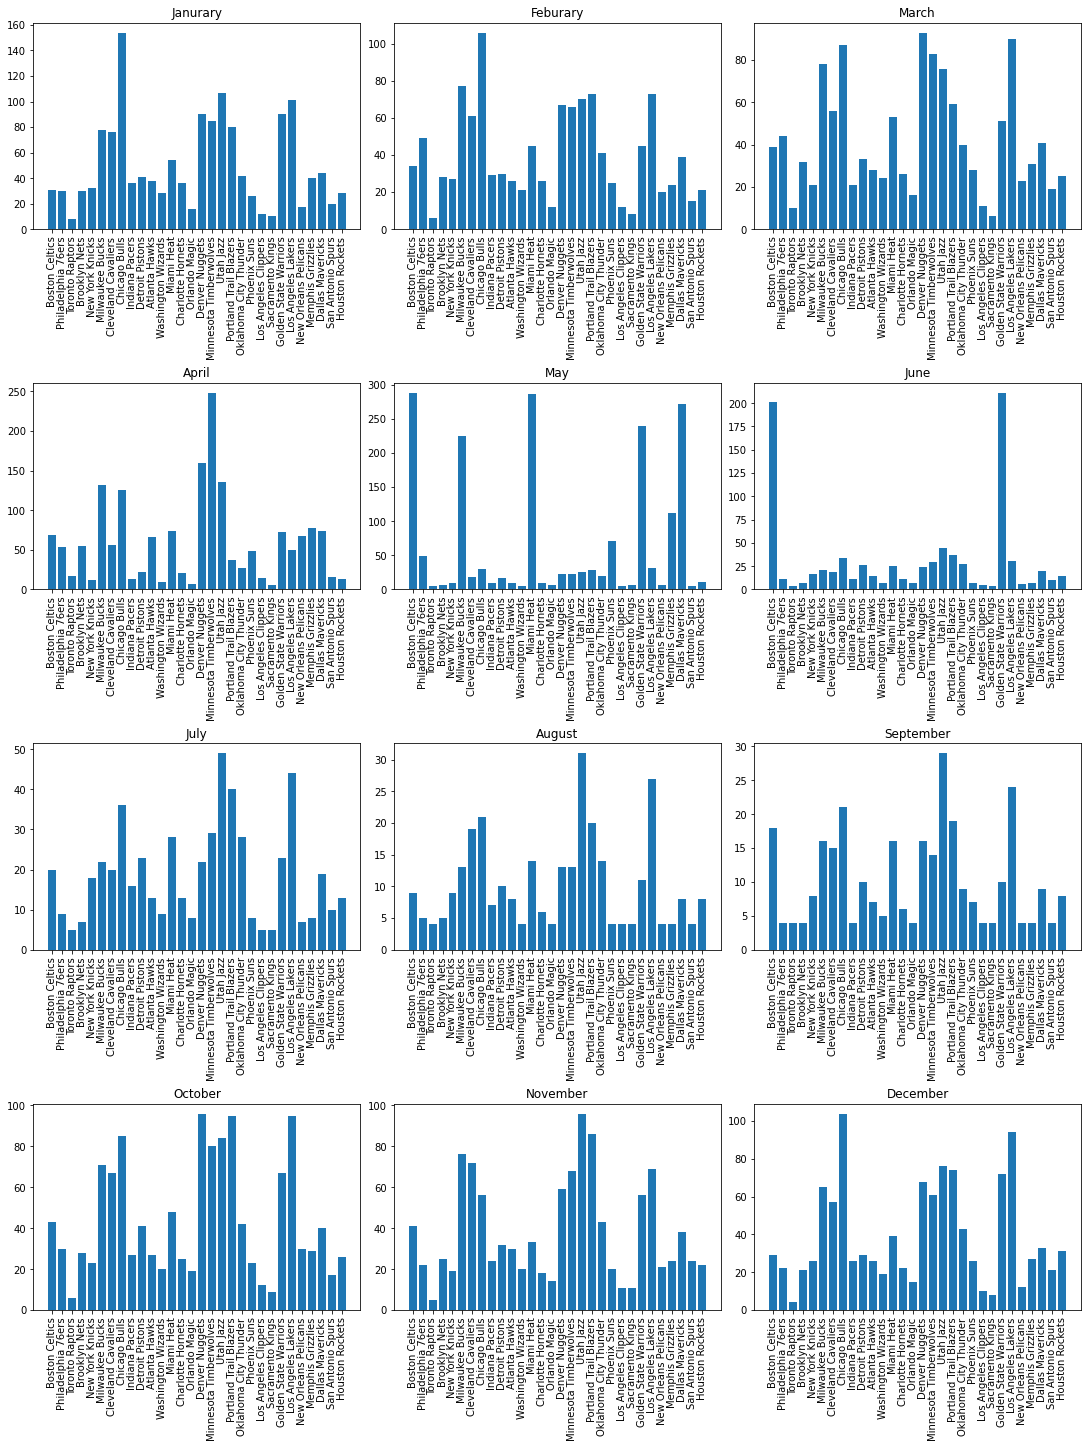

In [53]:
fig1, ax1 = plt.subplots(4, 3, constrained_layout = True)
for i in range(0, 3):
    ax1[0, i].bar(monthlydata.drop('Unnamed: 0', axis = 1).columns, monthlydata.drop('Unnamed: 0', axis = 1).iloc[i])
    ax1[0, i].set_title(monthlydata['Unnamed: 0'].iloc[i])
    ax1[0, i].tick_params(axis='x', labelrotation = 90)

for i in range(0, 3):
    ax1[1, i].bar(monthlydata.drop('Unnamed: 0', axis = 1).columns, monthlydata.drop('Unnamed: 0', axis = 1).iloc[i+3])
    ax1[1, i].set_title(monthlydata['Unnamed: 0'].iloc[i+3])
    ax1[1, i].tick_params(axis='x', labelrotation = 90)
    
for i in range(0, 3):
    ax1[2, i].bar(monthlydata.drop('Unnamed: 0', axis = 1).columns, monthlydata.drop('Unnamed: 0', axis = 1).iloc[i+6])
    ax1[2, i].set_title(monthlydata['Unnamed: 0'].iloc[i+6])
    ax1[2, i].tick_params(axis='x', labelrotation = 90)
    
for i in range(0, 3):
    ax1[3, i].bar(monthlydata.drop('Unnamed: 0', axis = 1).columns, monthlydata.drop('Unnamed: 0', axis = 1).iloc[i+9])
    ax1[3, i].set_title(monthlydata['Unnamed: 0'].iloc[i+9])
    ax1[3, i].tick_params(axis='x', labelrotation = 90)
    
fig1.set_figwidth(15)
fig1.set_figheight(20)
#fig1.figure.get_layout_engine().set(w_pad=4 / 72, h_pad=10 / 72, hspace=0.2, wspace=0.2)
    
    

plt.show()

Below is another visualization that displays teams popularity over the entire year, so this will allow me to see what team had the total most popularity over the entirety of the last 12 months. This is using the 'yearlydata' DataFrame that was seen earlier.

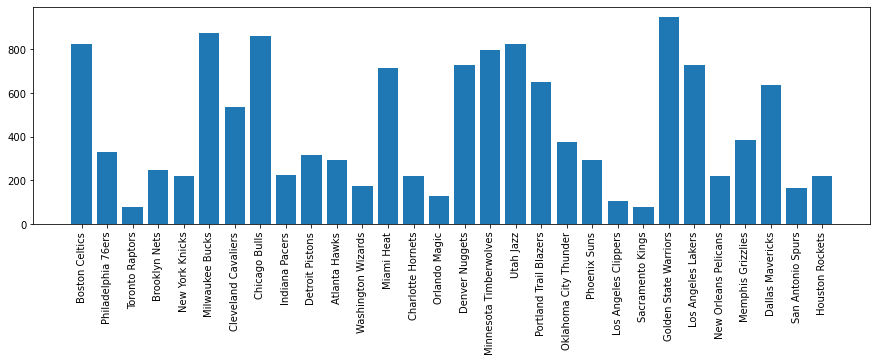

In [15]:
fig2, ax2 = plt.subplots()
ax2.bar(yearlydata.columns, yearlydata.iloc[0])
ax2.tick_params(axis='x', labelrotation = 90)
fig2.set_figwidth(15)

plt.show()

## Conclusions

After being able to visualize the data, I can determine that my assumptions in my hypothesis were very similiar to the results that came out of the data. Teams that are located in big market cities like the Boston Celtics, Los Angeles Lakers, Chicago Bulls, Golden State Warriors and Miami Heat seem to have the most popularity on Google. This is to no surprise considering that these are the teams that get the most attnetion in the media due to the markets that they are in that attract players to play for these teams. 

Now moving on to the monthly data, you can see that again, similar to my hypothesis, the months that seem to be the most popular are October through Janurary. This is most likley due to the fact that this is the prime of the NBA season. Additionally, you can see a jump in March, due to this being the time the playoffs start, as well as a jump around August and September because this is when offseason free agency is at it's height. 

For someone like me who is a rabid NBA fan, it is really interesting to see how some teams just randomly jump some months because of the fact that for various reasons, they are in the news for that month. One thing that I did not expect to see was in June. As you can see, the Golden State Warriors, and the Boston Celtics are significantly higher that every other team due to the fact that this is when the Finals take place, and these were the two teams that were in the Finals last year, however I did not expect the rest of the league to be so low in comparison to those two teams.